# SmartBeds - Manifolds

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador

In [1]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #%matplotlilib.pyplot como plt
import mpl_toolkits.mplot3d #Matplotlib 3d
import pickle as pk #Pikcle as pk
import gc #Garbage colector

## Lectura de datos

In [2]:
with open('datos.pdd','rb') as f:
    datos = pk.load(f)
    
datos_seizure = datos.loc[datos['target']==True]
datos_notSeizure = datos.loc[datos['target']==False]

In [3]:
with open('datosE.pdd','rb') as f:
    dataE = pk.load(f)

dataE_seizure = dataE.loc[dataE['target']==True]
dataE_notSeizure = dataE.loc[dataE['target']==False]

## Particionado - Solo día de ataques

In [3]:
### Días donde hubo crisis
dayOfSeizures = set()

for i in datos_seizure['DateTime']:
    dayOfSeizures.add(i.date())


#Todos los datos de esos días
crit = datos['DateTime'].map(lambda x: x.date() in dayOfSeizures)

datosPart = datos[crit]
datosPart.head()
len(datosPart)

118138

In [4]:
data = datosPart.iloc[:,1:len(datosPart.columns)-1]
data = data.astype(np.float32)
data.head()

,P1,P2,P3,P4,P5,P6
2067198,6.678385,30.964006,33.673767,39.638027,40.276264,17.874468
2067199,6.839407,30.850166,33.727673,39.797081,40.441086,17.861496
2067200,7.104354,30.732769,33.754337,39.932522,40.570881,17.842735
2067201,7.464684,30.613813,33.756493,40.047768,40.669830,17.819447
2067202,7.909863,30.495380,33.737396,40.146648,40.742577,17.792915


## SpectralEmbedding

In [5]:
from sklearn.manifold import SpectralEmbedding as SE

### Datos brutos

In [11]:
seB = SE(n_components=2,n_neighbors=50).fit_transform(data) #Con 50 vecinos no peta

Text(0.5, 1.0, 'Spectral Embedding Raw - Days of seizures')

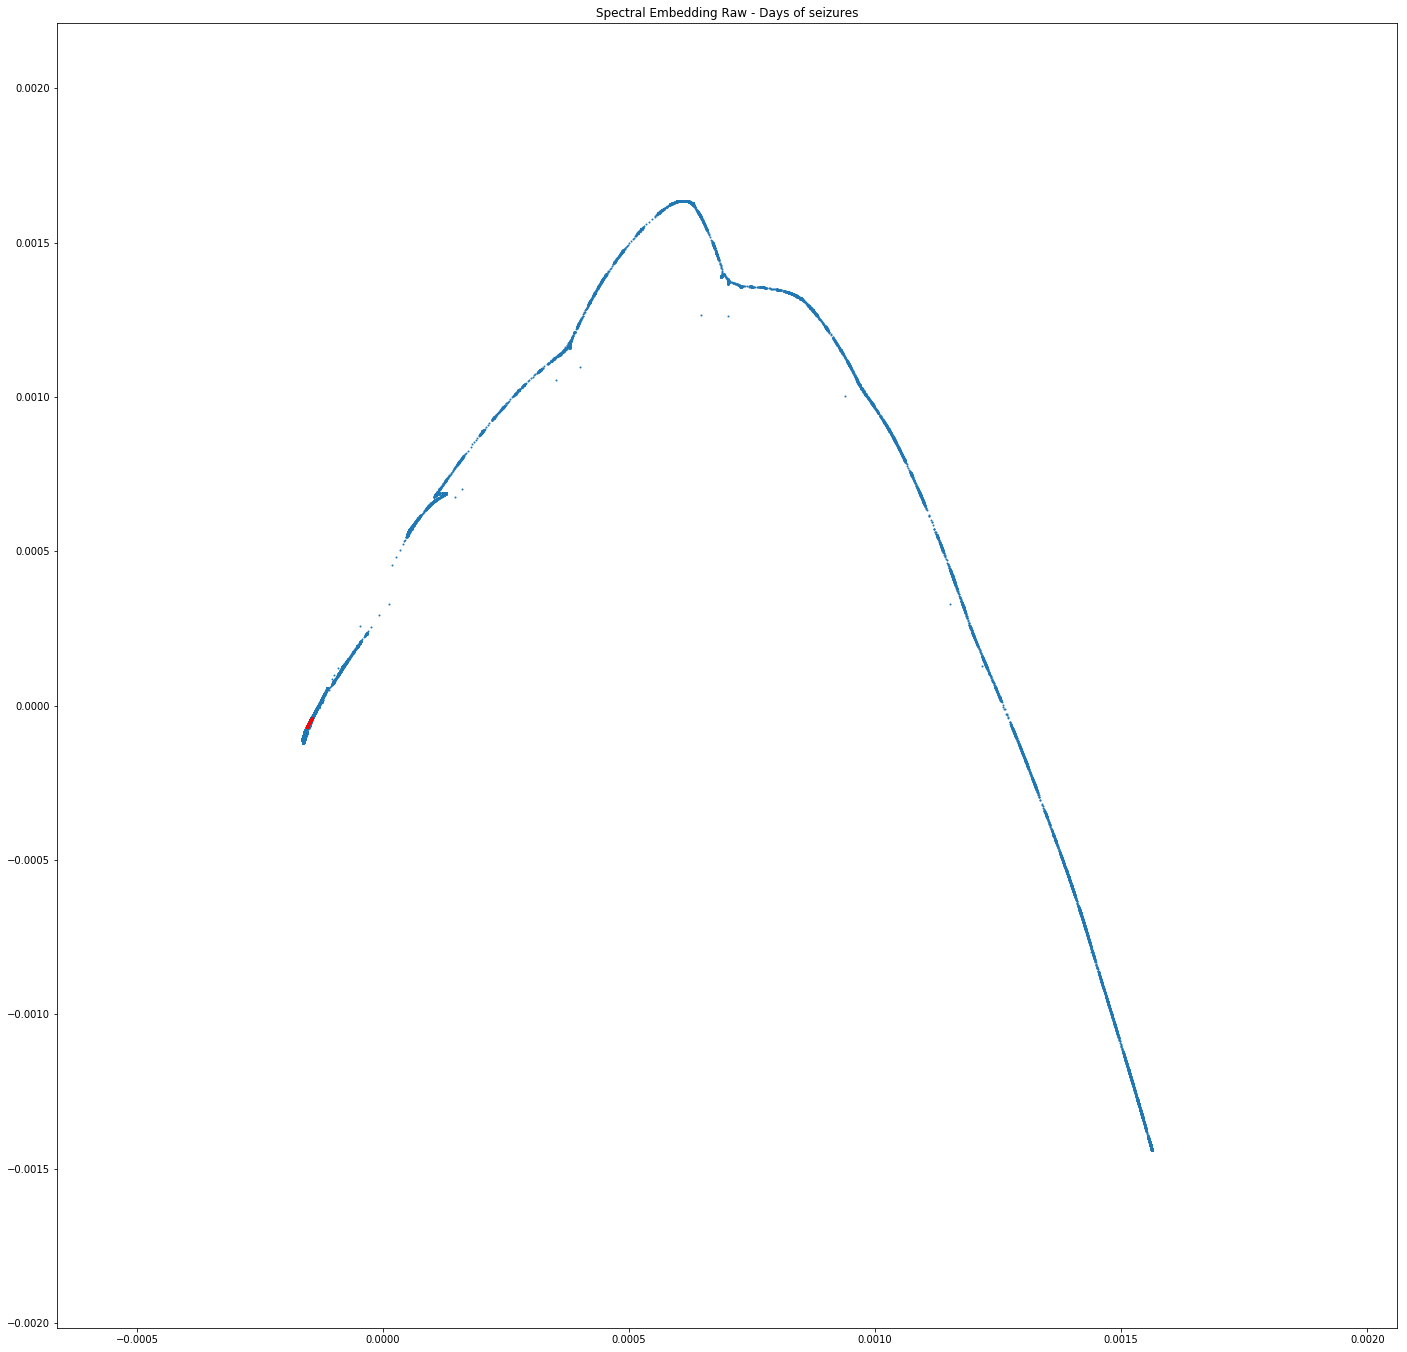

In [12]:
plt.figure(figsize=(24,24))
seSample = seB

target = datosPart['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(seSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]

plt.scatter(X,Y,s=1)
plt.scatter(X_t,Y_t,s=1,c='r')
plt.title('Spectral Embedding Raw - Days of seizures')


### t-SNE

In [6]:
from tsnecuda import TSNE

#### Datos Brutos

In [9]:
tsneB = TSNE(n_components=2).fit_transform(data)

Text(0.5, 1.0, 't-SNE Raw - Days of seizures')

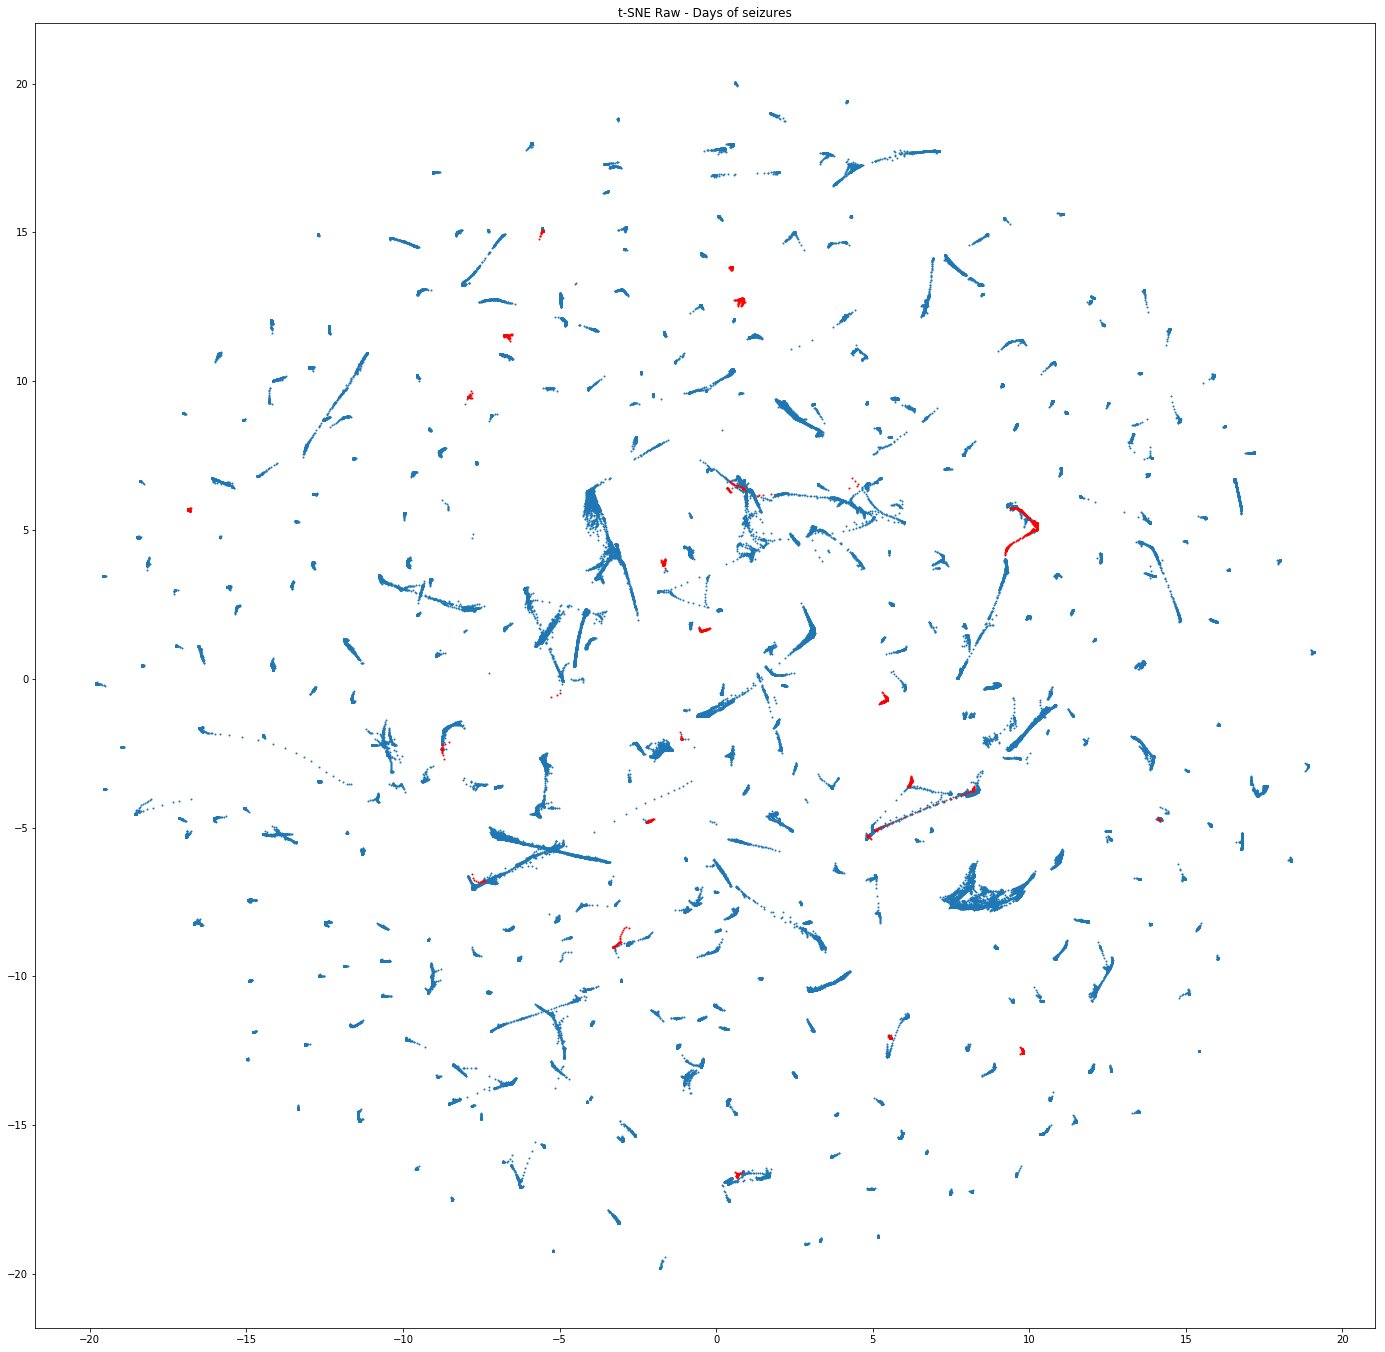

In [10]:
plt.figure(figsize=(24,24))
tsneSample = tsneB

target = datosPart['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(tsneSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]

plt.scatter(X,Y,s=1)
plt.scatter(X_t,Y_t,s=1,c='r')
plt.title('t-SNE Raw - Days of seizures')

### MDS

In [5]:
from sklearn.manifold import MDS

#### Datos Brutos

In [ ]:
mdsB = MDS(n_components=2,max_iter=100).fit_transform(data)

/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


In [ ]:
plt.figure(figsize=(24,24))
mdsSample = mdsB

target = datosPart['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(mdsSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]

plt.scatter(X,Y,s=1)
plt.scatter(X_t,Y_t,s=1,c='r')
plt.title('MDS Raw - Days of seizures')

### LTSA

In [5]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

#### Datos Brutos

In [9]:
ltsaB = LLE(n_components=2,method='ltsa').fit_transform(data)

/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:931: LinAlgWarning: Diagonal number 16385 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


Text(0.5, 1.0, 'MDS Raw - Days of seizures')

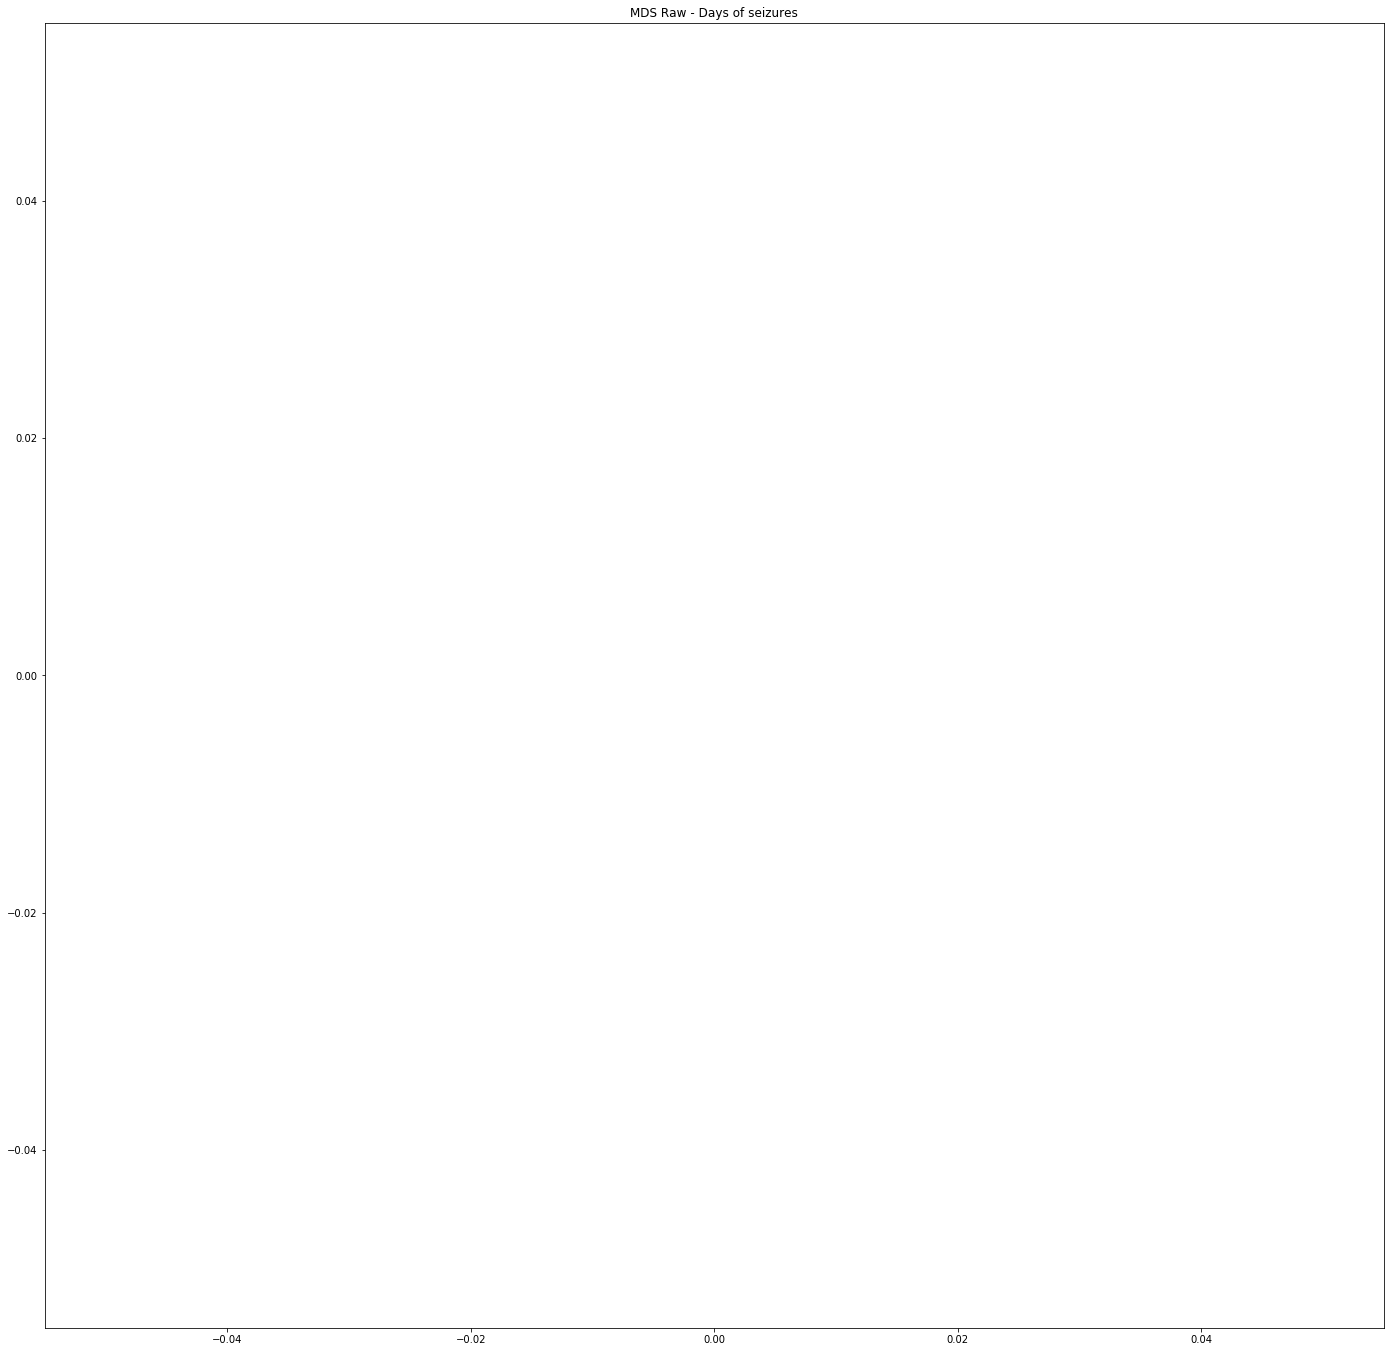

In [10]:
plt.figure(figsize=(24,24))
ltsaSample = ltsaB

target = datosPart['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(ltsaSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]

plt.scatter(X,Y,s=1)
plt.scatter(X_t,Y_t,s=1,c='r')
plt.title('MDS Raw - Days of seizures')